# **Harnessing LSTM Networks for Advanced Text Classification in Natural Language Processing**

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\bharg\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
df = pd.read_csv('./SPAM text message 20170820 - Data.csv',delimiter=',',encoding='latin-1')
df = df[['Category','Message']]
df = df[pd.notnull(df['Message'])]
df.rename(columns = {'Message':'Message'}, inplace = True)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.index = range(5572)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

87265

VISUALIZING THE DATA


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


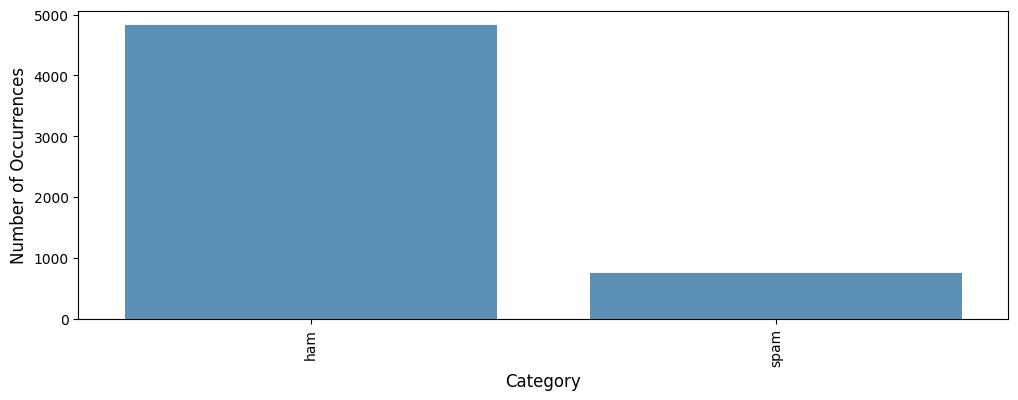

In [6]:
!pip install seaborn --upgrade # Upgrade seaborn to the latest version

import seaborn as sns
import matplotlib.pyplot as plt

cnt_pro = df['Category'].value_counts()
plt.figure(figsize=(12,4))
# Pass data as DataFrame and specify x and y columns
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [7]:
def print_message(index):
    example = df[df.index == index][['Message', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(13)

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
Message: ham


In [8]:
print_message(0)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Message: ham


Text Preprocessing Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [9]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)

C:\Users\bharg\AppData\Local\Temp\ipykernel_17492\3842572050.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [10]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

<>:26: SyntaxWarning: invalid escape sequence '\]'
<>:26: SyntaxWarning: invalid escape sequence '\]'
C:\Users\bharg\AppData\Local\Temp\ipykernel_17492\2281011538.py:26: SyntaxWarning: invalid escape sequence '\]'
  tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Found 5572 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5572, 50)


In [12]:
#train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['and', 'also', 'i', "'ve", 'sorta', 'blown', 'him', 'off', 'a', 'couple', 'times', 'recently', 'so', 'id', 'rather', 'not', 'tet', 'him', 'out', 'of', 'the', 'blue', 'looking', 'for', 'weed'], tags=['ham']),
       TaggedDocument(words=['mmm', 'thats', 'better', 'now', 'i', 'got', 'a', 'roast', 'down', 'me', '!', 'iâ\x92d', 'b', 'better', 'if', 'i', 'had', 'a', 'few', 'drinks', 'down', 'me', '2', '!', 'good', 'indian', '?'], tags=['ham']),
       TaggedDocument(words=['mm', 'have', 'some', 'kanji', 'dont', 'eat', 'anything', 'heavy', 'ok'], tags=['ham']),
       ...,
       TaggedDocument(words=['prabha', '..', 'i', "'m", 'soryda', '..', 'realy', '..', 'frm', 'heart', 'i', "'m", 'sory'], tags=['ham']),
       TaggedDocument(words=['nt', 'joking', 'seriously', 'i', 'told'], tags=['ham']),
       TaggedDocument(words=['did', 'he', 'just', 'say', 'somebody', 'is', 'named', 'tampa'], tags=['ham'])],
      dtype=object)

In [13]:

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm

d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065) # Use vector_size instead of size
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 5571/5571 [00:00<00:00, 5550229.83it/s]


In [14]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 5571/5571 [00:00<00:00, 1828076.01it/s]


CPU times: total: 7.25 s
Wall time: 7.36 s


In [15]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [16]:
len(d2v_model.wv.key_to_index)

9361

In [17]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv.key_to_index)+ 1, 20))
for i in range(len(d2v_model.dv)): # Iterate over the document vectors
    embedding_matrix[i] = d2v_model.dv[i] # Assign the document vector to the embedding matrix

Measuring distance between two vectors (related to cosine similarity)

In [18]:
d2v_model.wv.most_similar(positive=['urgent'], topn=10)

[('07815296484', 0.7593104839324951),
 ('aint', 0.754987895488739),
 ('07742676969', 0.743069589138031),
 ('callertune', 0.7344749569892883),
 ('11mths+', 0.7191394567489624),
 ('s.i.m', 0.7146058678627014),
 ('o2', 0.7062824368476868),
 ('reserve', 0.7062138319015503),
 ('07', 0.7036053538322449),
 ('callers', 0.7026107907295227)]

In [19]:
d2v_model.wv.most_similar(positive=['cherish'], topn=10)

[('mojibiola', 0.8589452505111694),
 ('okors', 0.8102198243141174),
 ('enjoyed', 0.795595645904541),
 ('semester', 0.7814013957977295),
 ('hello.how', 0.7795554399490356),
 ('thank', 0.7411254644393921),
 ('are', 0.7336298823356628),
 ('listener', 0.7087315917015076),
 ('programs', 0.7040424942970276),
 ('glorious', 0.7032230496406555)]

Create the LSTM Model

In [36]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

# Initialize the model
model = Sequential()

# Add Embedding Layer
model.add(Embedding(
    input_dim=len(d2v_model.wv.key_to_index) + 1,  # Vocabulary size
    output_dim=20,  # Embedding vector size
    #input_length=X.shape[1],  # Sequence length
    weights=[embedding_matrix],  # Pre-trained embeddings
    trainable=True  # Set False if using pre-trained embeddings without training
))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))

# Add Dense output layer (2 classes -> softmax, 1 class -> sigmoid)
model.add(Dense(2, activation="softmax"))  # Use 1 unit with "sigmoid" for binary classification

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │       187,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,240 (731.41 KB)

 Trainable params: 187,240 (731.41 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
Y = pd.get_dummies(df['Category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4736, 50) (4736, 2)
(836, 50) (836, 2)


In [38]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =20, batch_size=batch_size, verbose = 2)

Epoch 1/20
148/148 - 3s - 17ms/step - accuracy: 0.9219 - loss: 0.2170
Epoch 2/20
148/148 - 1s - 8ms/step - accuracy: 0.9842 - loss: 0.0551
Epoch 3/20
148/148 - 1s - 8ms/step - accuracy: 0.9928 - loss: 0.0259
Epoch 4/20
148/148 - 1s - 8ms/step - accuracy: 0.9970 - loss: 0.0135
Epoch 5/20
148/148 - 1s - 8ms/step - accuracy: 0.9983 - loss: 0.0073
Epoch 6/20
148/148 - 1s - 8ms/step - accuracy: 0.9989 - loss: 0.0040
Epoch 7/20
148/148 - 1s - 9ms/step - accuracy: 0.9992 - loss: 0.0024
Epoch 8/20
148/148 - 1s - 8ms/step - accuracy: 0.9996 - loss: 0.0013
Epoch 9/20
148/148 - 1s - 9ms/step - accuracy: 0.9996 - loss: 8.8318e-04
Epoch 10/20
148/148 - 1s - 8ms/step - accuracy: 1.0000 - loss: 5.6296e-04
Epoch 11/20
148/148 - 1s - 8ms/step - accuracy: 1.0000 - loss: 3.8609e-04
Epoch 12/20
148/148 - 1s - 9ms/step - accuracy: 1.0000 - loss: 2.8132e-04
Epoch 13/20
148/148 - 1s - 9ms/step - accuracy: 1.0000 - loss: 2.1472e-04
Epoch 14/20
148/148 - 1s - 8ms/step - accuracy: 1.0000 - loss: 1.7049e-04
Epoc

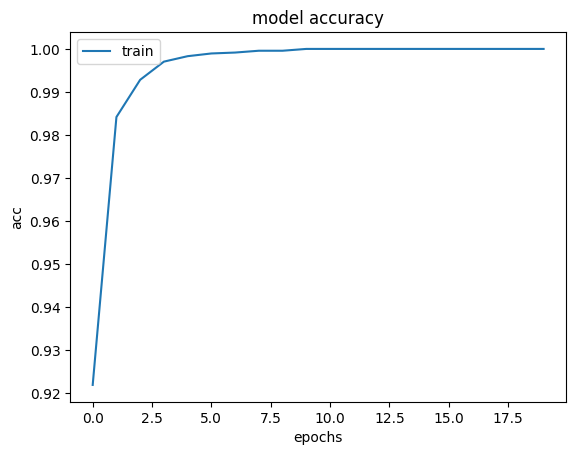

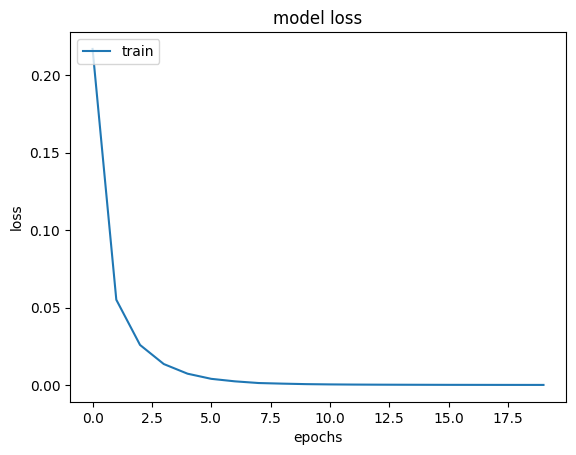

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [41]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

148/148 - 1s - 5ms/step - accuracy: 1.0000 - loss: 4.9197e-05
27/27 - 0s - 12ms/step - accuracy: 0.9856 - loss: 0.1113
Train: 1.000, Test: 0.9856


In [42]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)

# predict crisp classes for test set
import numpy as np
yhat_classes = np.argmax(model.predict(X_test, verbose=0), axis=-1) # Use argmax to get class predictions
print(yhat_classes)

# reduce to 1d array (if needed)
yhat_probs = yhat_probs[:, 0]

[[9.99998093e-01 1.96045698e-06]
 [9.99987006e-01 1.30288045e-05]
 [9.99997497e-01 2.51757774e-06]
 ...
 [9.99998093e-01 1.86710395e-06]
 [9.99998450e-01 1.51697418e-06]
 [9.99997258e-01 2.75211619e-06]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [44]:
!pip install pydot


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [46]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[727,   2],
       [ 10,  97]], dtype=int64)

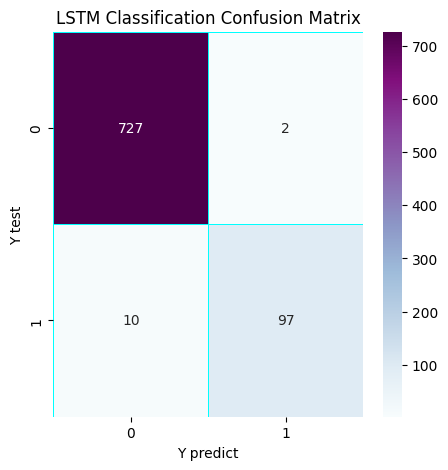

In [48]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [49]:
validation_size = 200

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.1182   
score: 0.14
acc: 0.98


In [50]:
model.save('Mymodel.h5')

In [51]:
message = ['URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[2.3741415e-05 9.9997628e-01]] spam


In [52]:
message = ['thanks for accepting my request to connect']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[9.9999130e-01 8.7046565e-06]] ham
